# Inspect ScaleVarianceTask on decam coadd patches
We plot the ScaleVarianceTask correction factors on the ap_verify_hits2015 template patches.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler, DatasetRef
plt.rcParams['figure.figsize'] = (8.5, 5)
from lsst.pipe.tasks.scaleVariance import ScaleVarianceTask, ScaleVarianceConfig
from astropy.table import Table

In [3]:
butler = Butler("/project/gkovacs/run_sessions/repo_DM-22396/repo", collections='DM-22396_pccd', writeable=False)
skyMapRef = butler.registry.findDataset("skyMap", dataId={'skymap': "deepCoadd_skyMap"})
skyMap = butler.get(skyMapRef)
coaddRefs = butler.registry.queryDatasets("deepCoadd", dataId = {'band': 'g' })
exposure = butler.get("calexp", visit=412060, detector=25)

In [4]:
scaleConfig = ScaleVarianceConfig()

In [5]:
scaleTask = ScaleVarianceTask(config=scaleConfig)
R = []
for cref in coaddRefs:
    singleP = butler.get(cref)
    try:
        # There are some patches with all NaN where this task fails with runtime error
        scaleFactor = scaleTask.calculateBothFactors(singleP.getMaskedImage())
    except:
        pass
    x = [ cref.dataId['tract'], cref.dataId['patch'], scaleFactor.pixFactor, scaleFactor.imageFactor]
    R.append(x)
    print(x)

[0, 1560, 0.7637611710399189, 0.8927288762469118]
[0, 1561, 0.7701567892703767, 0.8962365581693326]
[0, 1562, 0.7042535440320281, 0.8464861162857572]
[0, 1563, 0.7129140982254633, 0.834124691000312]
[0, 1604, 0.6988414870106362, 0.9108867996526846]
[0, 1605, 0.7159630770668921, 0.860459167847463]
[0, 1606, 0.6858031878787973, 0.775375045185333]
[0, 1607, 0.7065522640887228, 0.9058706206755559]
[0, 1608, 0.7096680095694087, 0.8259269504702931]
[0, 1609, 0.6980368131721878, 0.8117479179616512]
[0, 1649, 0.6931733899674244, 0.8176977624018632]
[0, 1650, 0.7158131837826287, 0.8628054480162144]
[0, 1651, 0.6919943636218604, 0.8218271151533572]
[0, 1652, 0.7019324243564752, 0.8545594271771273]
[0, 1653, 0.7052794886817157, 0.8574038834809122]
[0, 1654, 0.6995241245011571, 0.8278292535463478]
[0, 1655, 0.6747122701415811, 0.8138381027798093]
[0, 1693, 0.31193410782350117, 0.34492636773472196]
[0, 1694, 0.5004971671664404, 0.4895730835268622]
[0, 1695, 0.5261028392415463, 0.46069849814297237]


In [6]:
T = Table(names=['tract', 'patch', 'pixFactor', 'imgFactor'], rows=R)

<IPython.core.display.Javascript object>


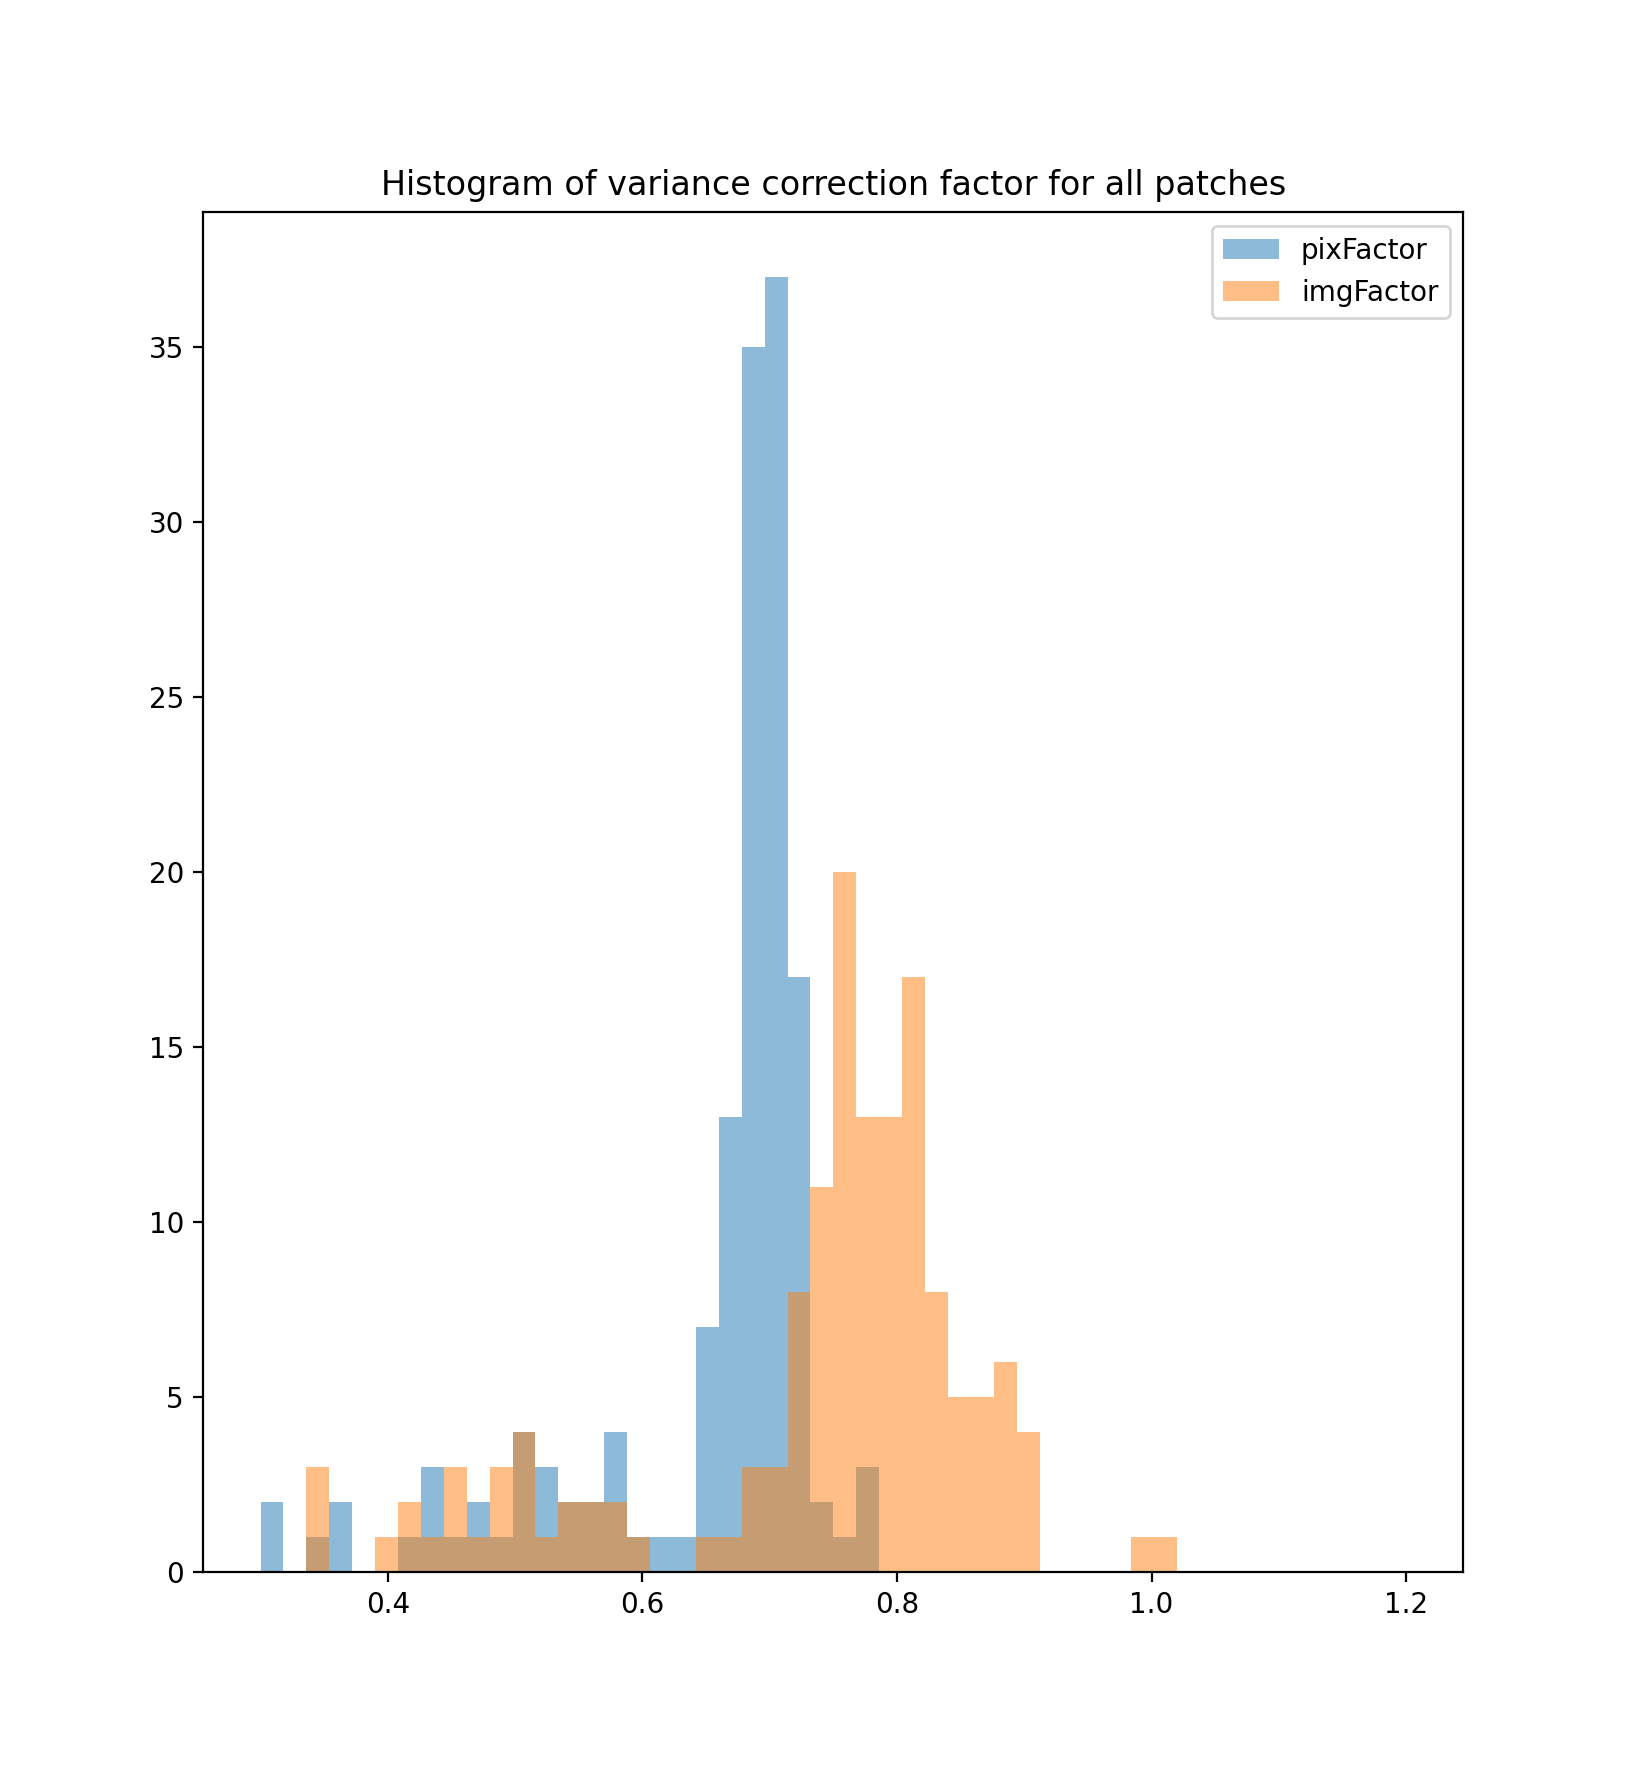

In [7]:
fig, ax = plt.subplots()
ax.hist(T['pixFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='pixFactor')
ax.hist(T['imgFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='imgFactor')
ax.set_title("Histogram of variance correction factor for all patches")
ax.legend()